In [5]:
import numpy as np
import pandas as pd
import findspark
findspark.init('/home/jun3/Downloads/spark-2.4.3-bin-hadoop2.7/')
import pyspark

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
pd.set_option('display.precision',16)

In [8]:
df_immig = pd.read_csv('immigration_data_sample.csv', dtype= {'cicid': np.int32}, float_precision='high').drop(labels=['Unnamed: 0'], axis=1)

In [9]:
df_immig.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
cicid,4084316,4422636,1195600,5291768,985523,1481650,2197173,232708,5227851,13213
i94yr,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016
i94mon,4,4,4,4,4,4,4,4,4,4
i94cit,209,582,148,297,111,577,245,113,131,116
i94res,209,582,112,297,111,577,245,135,131,116
i94port,HHW,MCA,OGG,LOS,CHM,ATL,SFR,NYC,CHI,LOS
arrdate,20566,20567,20551,20572,20550,20552,20556,20546,20572,20545
i94mode,1,1,1,1,3,1,1,1,1,1
i94addr,HI,TX,FL,CA,NY,GA,CA,NY,IL,CA
depdate,20573,20568,20571,20581,20553,20606,20635,20554,20575,20553


In [10]:
df_cit_res = pd.read_csv("./label_data/i94_country_code_cit_res.csv")

In [11]:
df_cit_res.head()

,country_code,country_name
0,582,"'MEXICO Air Sea, and Not Reported (I-94, no l..."
1,236,'AFGHANISTAN'
2,101,'ALBANIA'
3,316,'ALGERIA'
4,102,'ANDORRA'


In [12]:
df_immig2 = df_immig.merge(df_cit_res, left_on='i94cit', right_on="country_code")

In [13]:
df_immig2.head(5)

,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,depdate,...,biryear,dtaddto,gender,insnum,airline,admnum,fltno,visatype,country_code,country_name
0,4084316,2016.0,4.0,209.0,209.0,HHW,20566.0,1.0,HI,20573.0,...,1955.0,07202016,F,NaN,JL,56582674633.0,00782,WT,209,'JAPAN'
1,5056736,2016.0,4.0,209.0,209.0,PHI,20571.0,1.0,HI,20575.0,...,1944.0,07252016,M,NaN,DL,59336618033.0,00598,WT,209,'JAPAN'
2,2721962,2016.0,4.0,209.0,209.0,NEW,20559.0,1.0,HI,20562.0,...,1975.0,07132016,NaN,NaN,HA,56217031933.0,00458,WT,209,'JAPAN'
3,5472659,2016.0,4.0,209.0,209.0,NEW,20573.0,1.0,NY,20579.0,...,2008.0,07272016,M,NaN,UA,59478726133.0,00078,WT,209,'JAPAN'
4,861557,2016.0,4.0,209.0,209.0,SDP,20549.0,1.0,NaN,20552.0,...,1970.0,07032016,M,NaN,JL,55663229533.0,00066,WT,209,'JAPAN'


In [14]:
len(df_immig[df_immig['i94cit']==209])

65

In [15]:
df_immig2 = df_immig2.merge(df_cit_res, left_on='i94res', right_on="country_code")

In [16]:
df_immig2.head()

,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,depdate,...,gender,insnum,airline,admnum,fltno,visatype,country_code_x,country_name_x,country_code_y,country_name_y
0,4084316,2016.0,4.0,209.0,209.0,HHW,20566.0,1.0,HI,20573.0,...,F,NaN,JL,56582674633.0,00782,WT,209,'JAPAN',209,'JAPAN'
1,5056736,2016.0,4.0,209.0,209.0,PHI,20571.0,1.0,HI,20575.0,...,M,NaN,DL,59336618033.0,00598,WT,209,'JAPAN',209,'JAPAN'
2,2721962,2016.0,4.0,209.0,209.0,NEW,20559.0,1.0,HI,20562.0,...,NaN,NaN,HA,56217031933.0,00458,WT,209,'JAPAN',209,'JAPAN'
3,5472659,2016.0,4.0,209.0,209.0,NEW,20573.0,1.0,NY,20579.0,...,M,NaN,UA,59478726133.0,00078,WT,209,'JAPAN',209,'JAPAN'
4,861557,2016.0,4.0,209.0,209.0,SDP,20549.0,1.0,NaN,20552.0,...,M,NaN,JL,55663229533.0,00066,WT,209,'JAPAN',209,'JAPAN'


In [17]:
df_immig2.columns =['cicid', 'i94yr', 'i94mon', 'i94cit', 'i94res', 'i94port', 'arrival_date',
       'i94mode', 'i94addr', 'depart_date', 'i94_age', 'i94visa', 'count',
       'dtadfile', 'visapost', 'occup', 'entdepa', 'entdepd', 'entdepu',
       'matflag', 'biryear', 'dtaddto', 'gender', 'ins_num', 'airline',
       'adm_num', 'flt_no', 'visatype', 'country_code_cit', 'country_name_cit',
       'country_code_res', 'country_name_res']

In [18]:
df_immig2.head(15).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cicid,4084316,5056736,2721962,5472659,861557,4086972,3148387,2351028,2027276,2926213,1028660,680812,2720247,5475279,3147418
i94yr,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016
i94mon,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
i94cit,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209
i94res,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209
i94port,HHW,PHI,NEW,NEW,SDP,SFR,TAM,FTL,SFR,SPM,MIL,BOS,HHW,HHW,TAM
arrival_date,20566,20571,20559,20573,20549,20566,20561,20557,20555,20560,20550,20548,20559,20573,20561
i94mode,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3
i94addr,HI,HI,HI,NY,NaN,CA,CA,CA,MO,CA,CA,MA,HI,HI,TX
depart_date,20573,20575,20562,20579,20552,20577,20565,20560,20562,20566,20553,20552,20563,20577,20562


In [19]:
df_immig2['entdepa'].unique()

array(['G', 'O', 'Z', 'T', 'K', 'U', 'H', 'P', 'A'], dtype=object)

In [20]:
df_immig2['visatype'].unique()

array(['WT', 'WB', 'E2', 'B2', 'B1', 'F1', 'CP', 'GMT', 'F2', 'M1'],
      dtype=object)

In [21]:
df_immig2['depart_date'].isnull().groupby(by=df_immig2['depart_date'].isnull()).count()

depart_date
False    827
True      46
Name: depart_date, dtype: int64

In [22]:
df_immig2['arrival_date'] = pd.to_timedelta(df_immig2['arrival_date'].values, unit='D') + pd.Timestamp('1960-1-1')

In [23]:
df_immig2['depart_date'] = pd.to_timedelta(df_immig2['depart_date'].values, unit='D') + pd.Timestamp('1960-1-1')

In [24]:
df_immig2.head()

,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrival_date,i94mode,i94addr,depart_date,...,gender,ins_num,airline,adm_num,flt_no,visatype,country_code_cit,country_name_cit,country_code_res,country_name_res
0,4084316,2016.0,4.0,209.0,209.0,HHW,2016-04-22,1.0,HI,2016-04-29,...,F,NaN,JL,56582674633.0,00782,WT,209,'JAPAN',209,'JAPAN'
1,5056736,2016.0,4.0,209.0,209.0,PHI,2016-04-27,1.0,HI,2016-05-01,...,M,NaN,DL,59336618033.0,00598,WT,209,'JAPAN',209,'JAPAN'
2,2721962,2016.0,4.0,209.0,209.0,NEW,2016-04-15,1.0,HI,2016-04-18,...,NaN,NaN,HA,56217031933.0,00458,WT,209,'JAPAN',209,'JAPAN'
3,5472659,2016.0,4.0,209.0,209.0,NEW,2016-04-29,1.0,NY,2016-05-05,...,M,NaN,UA,59478726133.0,00078,WT,209,'JAPAN',209,'JAPAN'
4,861557,2016.0,4.0,209.0,209.0,SDP,2016-04-05,1.0,NaN,2016-04-08,...,M,NaN,JL,55663229533.0,00066,WT,209,'JAPAN',209,'JAPAN'


In [25]:
df_immig2_no_depart = df_immig2[df_immig2['depart_date'].isnull()]

In [26]:
len(df_immig2_no_depart)

46

In [27]:
df_immig2_no_depart.head()

,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrival_date,i94mode,i94addr,depart_date,...,gender,ins_num,airline,adm_num,flt_no,visatype,country_code_cit,country_name_cit,country_code_res,country_name_res
41,54317,2016.0,4.0,209.0,209.0,HHW,2016-04-01,1.0,HI,NaT,...,M,NaN,JL,55432967433.0,00782,WT,209,'JAPAN',209,'JAPAN'
97,5827765,2016.0,4.0,582.0,582.0,PHO,2016-04-30,1.0,OK,NaT,...,F,NaN,Y4,94925566130.0,00902,B2,582,"'MEXICO Air Sea, and Not Reported (I-94, no l...",582,"'MEXICO Air Sea, and Not Reported (I-94, no l..."
102,4804280,2016.0,4.0,582.0,582.0,DAL,2016-04-25,1.0,CA,NaT,...,F,NaN,Y4,94540124330.0,00892,B2,582,"'MEXICO Air Sea, and Not Reported (I-94, no l...",582,"'MEXICO Air Sea, and Not Reported (I-94, no l..."
105,2814946,2016.0,4.0,582.0,582.0,ONT,2016-04-15,1.0,CA,NaT,...,F,NaN,AM,93556234930.0,00780,B2,582,"'MEXICO Air Sea, and Not Reported (I-94, no l...",582,"'MEXICO Air Sea, and Not Reported (I-94, no l..."
108,3434626,2016.0,4.0,582.0,582.0,CHI,2016-04-18,1.0,IL,NaT,...,M,NaN,Y4,93906121030.0,00946,B2,582,"'MEXICO Air Sea, and Not Reported (I-94, no l...",582,"'MEXICO Air Sea, and Not Reported (I-94, no l..."


In [28]:
df_no_depart_by_port = df_immig2_no_depart[['count']].groupby(by=df_immig2_no_depart['i94port']).count()

In [29]:
df_no_depart_by_port_sort = df_no_depart_by_port.sort_values(by='count',ascending=False)

<BarContainer object of 21 artists>

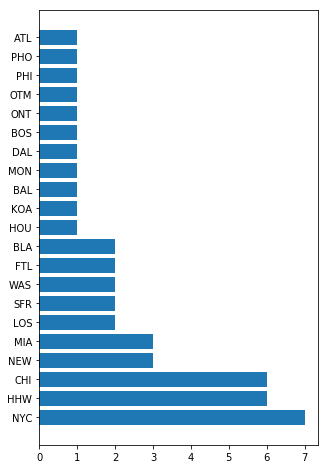

In [30]:
fig = plt.figure(figsize=(5, 8))
plt.barh(y=df_no_depart_by_port_sort.index, width=df_no_depart_by_port_sort['count'])

In [31]:
df_by_port = df_immig2[['count']].groupby(by=df_immig2['i94port']).count()

In [32]:
df_by_port_sort = df_by_port.sort_values(by='count',ascending=False)[0:21]

<BarContainer object of 21 artists>

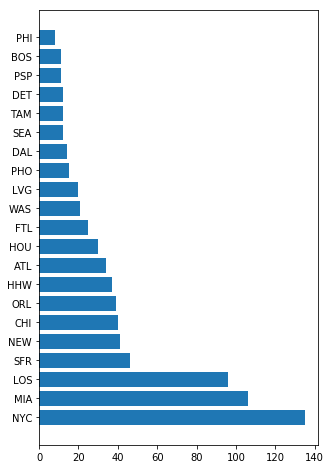

In [33]:
fig = plt.figure(figsize=(5, 8))
plt.barh(y=df_by_port_sort.index, width=df_by_port_sort['count'])

In [34]:
df_by_addr = df_immig2[['count']].groupby(by=df_immig2['i94addr']).count()

In [35]:
df_by_addr = df_by_addr.sort_values(by='count',ascending=False)[0:20]

<BarContainer object of 20 artists>

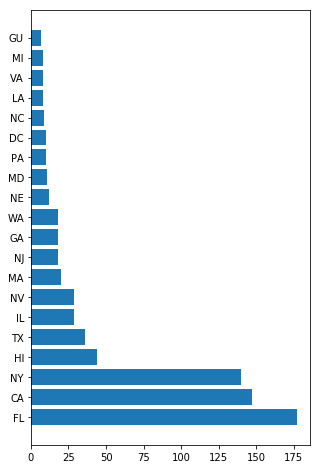

In [36]:
fig = plt.figure(figsize=(5, 8))
plt.barh(y=df_by_addr.index, width=df_by_addr['count'])

In [37]:
groupby_visatype = df_immig2[['count', 'visatype']].groupby(by='visatype').count()

In [38]:
groupby_visatype

,count
visatype,
B1,56
B2,340
CP,5
E2,2
F1,9
F2,3
GMT,1
M1,1
WB,77


<BarContainer object of 10 artists>

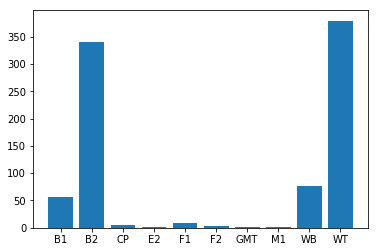

In [39]:
plt.bar(x=groupby_visatype.index, height=groupby_visatype['count'])

In [40]:
groupby_country_cit = df_immig2[['count', 'country_name_cit']].groupby(by='country_name_cit', as_index=False).count()

In [41]:
groupby_country_cit_sort=groupby_country_cit.sort_values(by="count", ascending=False)[0:20]

In [42]:
groupby_country_cit_sort

,country_name_cit,count
77,'UNITED KINGDOM',115
42,'JAPAN',65
14,"'CHINA, PRC'",60
48,"'MEXICO Air Sea, and Not Reported (I-94, no l...",57
25,'FRANCE',51
1,'AUSTRALIA',47
35,'INDIA',37
52,'NETHERLANDS',33
9,'BRAZIL',33
0,'ARGENTINA ',22


<BarContainer object of 20 artists>

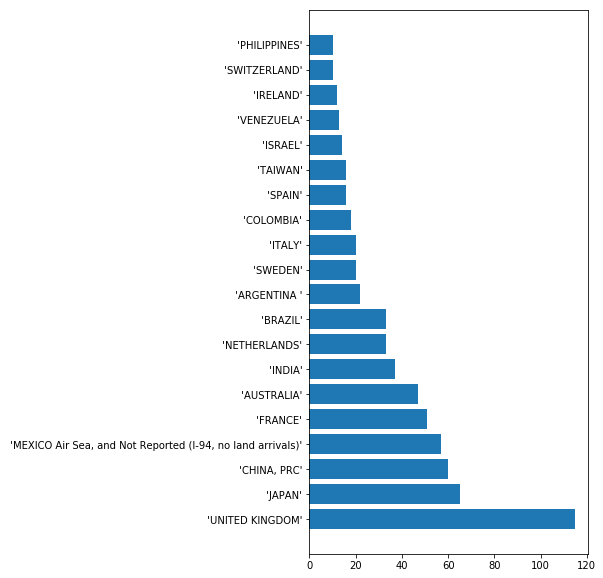

In [43]:
fig = plt.figure(figsize=(5, 10))
plt.barh(y=groupby_country_cit_sort['country_name_cit'], width=groupby_country_cit_sort['count'])

In [44]:
pd.set_option('display.precision',4)
df_temp = pd.read_csv("Global_city_temperatures.csv")

In [45]:
df_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [46]:
df_temp['Country'].unique()

array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States',
       'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela',
       'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'

In [47]:
df_temp_usa = df_temp[df_temp['Country']=='United States']

In [48]:
df_temp_usa.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
47555,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W
47556,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W
47557,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W
47558,1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W
47559,1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W


In [49]:
len(df_temp_usa.City.unique())

248

In [50]:
import re

In [51]:
# convert to DD geo-formats
def convert_latitude(s):
    if re.findall("[nN]$", s):
        s = float(s[:-1])
    elif re.findall("[sS]$", s): 
        s = float(s[:-1])*(-1)
    return s 

In [52]:
# convert to DD geo-formats
def convert_longitude(s):
    if re.findall("[eE]$", s):
        s = float(s[:-1])
    elif re.findall("[wW]$", s): 
        s = float(s[:-1])*(-1)
    return s 

In [53]:
 df_temp_usa["Latitude"] = df_temp_usa["Latitude"].map(convert_latitude)

/home/jun3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
df_temp_usa["Longitude"] = df_temp_usa["Longitude"].map(convert_longitude)

/home/jun3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
df_temp_usa.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
47555,1820-01-01,2.101,3.217,Abilene,United States,32.95,-100.53
47556,1820-02-01,6.926,2.853,Abilene,United States,32.95,-100.53
47557,1820-03-01,10.767,2.395,Abilene,United States,32.95,-100.53


In [56]:
df_temp_usa.tail(12)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
8439235,2012-10-01,12.436,0.344,Yonkers,United States,40.99,-74.56
8439236,2012-11-01,4.103,0.298,Yonkers,United States,40.99,-74.56
8439237,2012-12-01,2.586,0.257,Yonkers,United States,40.99,-74.56
8439238,2013-01-01,-0.968,0.290,Yonkers,United States,40.99,-74.56
8439239,2013-02-01,-1.365,0.241,Yonkers,United States,40.99,-74.56
8439240,2013-03-01,2.518,0.255,Yonkers,United States,40.99,-74.56
8439241,2013-04-01,9.723,0.355,Yonkers,United States,40.99,-74.56
8439242,2013-05-01,15.544,0.281,Yonkers,United States,40.99,-74.56
8439243,2013-06-01,20.892,0.273,Yonkers,United States,40.99,-74.56
8439244,2013-07-01,24.722,0.279,Yonkers,United States,40.99,-74.56


In [57]:
df_temp_usa_5yr= df_temp_usa[df_temp_usa['dt']>"2008-09-01"]

In [58]:
df_temp_usa_5yr.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
49820,2008-10-01,17.448,0.228,Abilene,United States,32.95,-100.53
49821,2008-11-01,12.379,0.162,Abilene,United States,32.95,-100.53
49822,2008-12-01,6.966,0.197,Abilene,United States,32.95,-100.53


In [59]:
df_temp_usa_5yr.tail(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
8439244,2013-07-01,24.722,0.279,Yonkers,United States,40.99,-74.56
8439245,2013-08-01,21.001,0.323,Yonkers,United States,40.99,-74.56
8439246,2013-09-01,17.408,1.048,Yonkers,United States,40.99,-74.56


In [60]:
def extract_month(dt):
    return dt[5:7]

In [61]:
extract_month(df_temp_usa_5yr.iloc[0, 0])

'10'

In [62]:
df_temp_usa_5yr['month'] = df_temp_usa_5yr['dt'].map(extract_month)

/home/jun3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
df_temp_usa_5yr.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,month
49820,2008-10-01,17.448,0.228,Abilene,United States,32.95,-100.53,10
49821,2008-11-01,12.379,0.162,Abilene,United States,32.95,-100.53,11
49822,2008-12-01,6.966,0.197,Abilene,United States,32.95,-100.53,12


In [64]:
average_temp_monthly_recent_5yr = df_temp_usa_5yr.groupby(by=['City', 'month'], as_index=False).mean()

In [65]:
average_temp_monthly_recent_5yr.head(12)

,City,month,AverageTemperature,AverageTemperatureUncertainty,Latitude,Longitude
0,Abilene,01,6.0952,0.2226,32.95,-100.53
1,Abilene,02,7.8100,0.2636,32.95,-100.53
2,Abilene,03,13.6628,0.3002,32.95,-100.53
3,Abilene,04,18.3316,0.2748,32.95,-100.53
4,Abilene,05,22.7326,0.2754,32.95,-100.53
5,Abilene,06,28.6390,0.2614,32.95,-100.53
6,Abilene,07,28.8618,0.2920,32.95,-100.53
7,Abilene,08,29.4784,0.3122,32.95,-100.53
8,Abilene,09,24.3458,0.4884,32.95,-100.53
9,Abilene,10,17.2816,0.2656,32.95,-100.53


In [66]:
df_airport = pd.read_csv("airport-codes_csv.csv")

In [67]:
df_airport.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"


In [68]:
len(df_airport[df_airport.continent.isnull()])

27719

In [ ]:
large_airport = df_airport[]

In [87]:
df_airport["type"].value_counts()

small_airport     33965
heliport          11287
medium_airport     4550
closed             3606
seaplane_base      1016
large_airport       627
balloonport          24
Name: type, dtype: int64

In [91]:
len(df_immig["i94port"].unique())

70

In [92]:
df_immig["i94port"].unique()

array(['HHW', 'MCA', 'OGG', 'LOS', 'CHM', 'ATL', 'SFR', 'NYC', 'CHI',
       'PHI', 'FTL', 'BOS', 'SAI', 'NAS', 'SEA', 'ORL', 'PSP', 'HOU',
       'NEW', 'BAL', 'SNJ', 'DET', 'AGA', 'LVG', 'MIA', 'SDP', 'VCV',
       'DUB', 'PEM', 'TAM', 'BLA', 'WAS', 'KOA', 'DAL', 'SHA', 'SPM',
       'NIA', 'PHR', 'MIL', 'SLC', 'CLT', 'EPI', 'SNA', 'MON', 'DLR',
       'SFB', 'OPF', 'X96', 'CLM', 'LIH', 'DEN', 'PHO', 'POO', 'NOL',
       'WPB', 'PBB', 'TOR', 'MAA', 'RNO', 'FMY', 'HIG', 'OAK', 'OTM',
       'ONT', 'SRQ', 'LLB', 'NCA', 'SUM', 'STR', 'HAM'], dtype=object)

In [69]:
len(df_airport)

55075

In [70]:
df_airport.local_code.unique()

array(['00A', '00AA', '00AK', ..., 'FAWT', 'ZEN', 'ZNC'], dtype=object)

In [71]:
# 'coordinates' column has (longitude, latitude) format, need to covert to (latitude, longitude) format or make latitude, longitude columns

In [72]:
def lon_coordinates(s):
    lon = s.split(", ")[0]   
    return lon

In [73]:
def lat_coordinates(s):
    lat = s.split(", ")[1]   
    return lat

In [74]:
df_airport['latitude'] = df_airport['coordinates'].map(lat_coordinates)

In [75]:
df_airport['longitude'] = df_airport['coordinates'].map(lon_coordinates)

In [76]:
df_airport.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates,latitude,longitude
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125",40.07080078125,-74.93360137939453
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022",38.704022,-101.473911
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968",59.94919968,-151.695999146
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172",34.86479949951172,-86.77030181884766
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087",35.6087,-91.254898


In [77]:
# df_airport_usa = df_airport[df_airport['iso_country']=='US']

In [78]:
len(df_airport)

55075

In [79]:
df_us_cities = pd.read_csv("us-cities-demographics.csv", sep=";")

In [80]:
df_us_cities.head()

,City,State,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,State Code,Race,Count
0,Silver Spring,Maryland,33.8,40601.0,41862.0,82463,1562.0,30908.0,2.60,MD,Hispanic or Latino,25924
1,Quincy,Massachusetts,41.0,44129.0,49500.0,93629,4147.0,32935.0,2.39,MA,White,58723
2,Hoover,Alabama,38.5,38040.0,46799.0,84839,4819.0,8229.0,2.58,AL,Asian,4759
3,Rancho Cucamonga,California,34.5,88127.0,87105.0,175232,5821.0,33878.0,3.18,CA,Black or African-American,24437
4,Newark,New Jersey,34.6,138040.0,143873.0,281913,5829.0,86253.0,2.73,NJ,White,76402


In [81]:
df_us_cities.pivot_table(index=["City", "Race"]).head(15)

Average Household Size     Count  \
City    Race                                                                  
Abilene American Indian and Alaska Native                    2.64    1813.0   
        Asian                                                2.64    2929.0   
        Black or African-American                            2.64   14449.0   
        Hispanic or Latino                                   2.64   33222.0   
        White                                                2.64   95487.0   
Akron   American Indian and Alaska Native                    2.24    1845.0   
        Asian                                                2.24    9033.0   
        Black or African-American                            2.24   66551.0   
        Hispanic or Latino                                   2.24    3684.0   
        White                                                2.24  129192.0   
Alafaya Asian                                                2.94   10336.0   
        Black or African-American                            2.94    6577.0   
        Hispanic or Latino                                   2.94   34897.0   
        White                                                2.94   63666.0   
Alameda American Indian and Alaska Native                    2.52    1329.0   

                                           Female Population  Foreign-born  \
City    Race                                                                 
Abilene American Indian and Alaska Native            60664.0        8129.0   
        Asian                                        60664.0        8129.0   
        Black or African-American                    60664.0        8129.0   
        Hispanic or Latino                           60664.0        8129.0   
        White                                        60664.0        8129.0   
Akron   American Indian and Alaska Native           100667.0       10024.0   
        Asian                                       100667.0       10024.0   
        Black or African-American                   100667.0       10024.0   
        Hispanic or Latino                          100667.0       10024.0   
        White                                       100667.0       10024.0   
Alafaya Asian                                        45760.0       15842.0   
        Black or African-American                    45760.0       15842.0   
        Hispanic or Latino                           45760.0       15842.0   
        White                                        45760.0       15842.0   
Alameda American Indian and Alaska Native            40867.0       18841.0   

                                           Male Population  Median Age  \
City    Race                                                             
Abilene American Indian and Alaska Native          65212.0        31.3   
        Asian                                      65212.0        31.3   
        Black or African-American                  65212.0        31.3   
        Hispanic or Latino                         65212.0        31.3   
        White                                      65212.0        31.3   
Akron   American Indian and Alaska Native          96886.0        38.1   
        Asian                                      96886.0        38.1   
        Black or African-American                  96886.0        38.1   
        Hispanic or Latino                         96886.0        38.1   
        White                                      96886.0        38.1   
Alafaya Asian                                      39504.0        33.5   
        Black or African-American                  39504.0        33.5   
        Hispanic or Latino                         39504.0        33.5   
        White                                      39504.0        33.5   
Alameda American Indian and Alaska Native          37747.0        41.4   

                                           Number of Veterans  \
City    Race                                    

In [82]:
len(df_us_cities)

2891